In [40]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [42]:
x_train = train_datagen.flow_from_directory(
    r'F:\IBM PROJECT\Nutrition Analyzer\Dataset\TRAIN_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

x_test = test_datagen.flow_from_directory(
    r'F:\IBM PROJECT\Nutrition Analyzer\Dataset\TEST_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse') 

Found 3982 images belonging to 5 classes.
Found 3982 images belonging to 5 classes.


In [43]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [44]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [45]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 882, 1: 1273, 2: 728, 3: 622, 4: 477})

In [46]:
classifier = Sequential()


classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))


classifier.add(Conv2D(32, (3, 3), activation='relu'))


classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))


In [47]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [48]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [49]:
classifier.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=40, validation_data=x_test,validation_steps = len(x_test))

Epoch 1/40


C:\Users\91909\AppData\Local\Temp\ipykernel_38840\3166227136.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


797/797 [==============================] - 28s 35ms/step - loss: 0.3775 - accuracy: 0.8684 - val_loss: 0.1649 - val_accuracy: 0.9432
Epoch 2/40
797/797 [==============================] - 28s 36ms/step - loss: 0.1901 - accuracy: 0.9319 - val_loss: 0.1209 - val_accuracy: 0.9528
Epoch 3/40
797/797 [==============================] - 28s 36ms/step - loss: 0.1584 - accuracy: 0.9442 - val_loss: 0.0986 - val_accuracy: 0.9621
Epoch 4/40
797/797 [==============================] - 32s 40ms/step - loss: 0.1331 - accuracy: 0.9508 - val_loss: 0.1000 - val_accuracy: 0.9679
Epoch 5/40
797/797 [==============================] - 30s 38ms/step - loss: 0.1344 - accuracy: 0.9555 - val_loss: 0.0814 - val_accuracy: 0.9706
Epoch 6/40
797/797 [==============================] - 35s 44ms/step - loss: 0.1179 - accuracy: 0.9558 - val_loss: 0.0736 - val_accuracy: 0.9721
Epoch 7/40
797/797 [==============================] - 34s 42ms/step - loss: 0.1211 - accuracy: 0.9566 - val_loss: 0.0762 - val_accuracy: 0.9719
Epo

In [50]:
classifier.save('FruitsAnalyser.h5')

In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

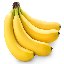

In [74]:
img = image.load_img("F:/IBM PROJECT/Nutrition Analyzer/Flask/Sample_Images/Test_Image2.jpg",target_size= (64,64))
img

In [75]:
x=image.img_to_array(img)
x.ndim
x=np.expand_dims(x,axis=0)
x.ndim
pred = classifier.predict(x)
labels=['APPLES', 'BANANA','ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

1/1 [==============================] - 0s 24ms/step


'ORANGE'